# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch # library for Dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
#importing warnings to ignore warningd
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [11]:
crime= pd.read_csv('crime_data.csv')
crime

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [13]:
crime.shape

(50, 5)

# EDA

In [14]:
#checking information about data
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Here we can see that the data type of each column is correct

In [15]:
# checking null values
crime.isnull().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

There are no null values

In [17]:
#Descriptive Statistics
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [18]:
#Checking duplicated Rows
crime[crime.duplicated()].sum()

Place       0.0
Murder      0.0
Assault     0.0
UrbanPop    0.0
Rape        0.0
dtype: float64

There are no Duplicate rows.

# Hierarchical clustering

In [19]:
#Normalize the data using Normalization Function- Standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
crime.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


We removed Place Column because it was not important for our model.

In [24]:
#normalize the data
crime_norm=pd.DataFrame(scaler.fit_transform(crime.iloc[:,1:]),columns=crime.columns[1:])
crime_norm

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


We need to do scaling to reduce the dominance of some rows that leads to high values in Euclidian Distance.

In [26]:
crime_norm.shape

(50, 4)

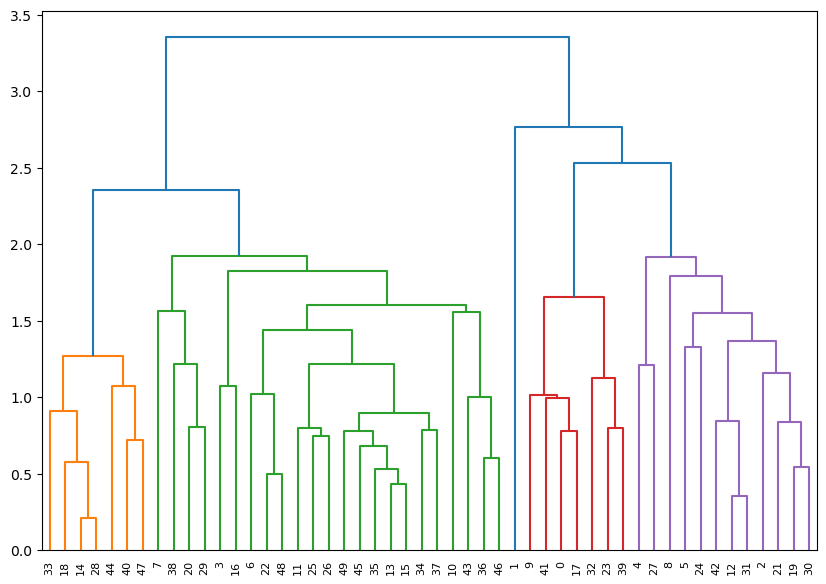

In [28]:
#Plot the hierarchical clustering as a dendrogram.
plt.figure(figsize=(10, 7))
Dendrogram=sch.dendrogram(sch.linkage(crime_norm,method='average'))

In [29]:
#perform hierachical clustering(Agglomarative)
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
hc

AgglomerativeClustering(linkage='average')

In [30]:
y_hc=hc.fit_predict(crime_norm)
y_hc


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
#make dataframe and attached clusterId column
crime['h_ClusterId']=pd.DataFrame(y_hc,columns=['h_ClusterId'])
crime

,Place,Murder,Assault,UrbanPop,Rape,h_ClusterId
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [32]:
#Apply Groupby on the dataframe & count mean
crime.groupby('h_ClusterId').agg(['mean']).reset_index()

C:\Users\Parth\AppData\Local\Temp\ipykernel_11812\4294501451.py:2: FutureWarning: ['Place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('h_ClusterId').agg(['mean']).reset_index()


,h_ClusterId,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165,255.250000,68.400000,29.165000
1,1,4.870,114.433333,63.633333,15.943333


Conclusion:

In Hierarchical Clustering we have 2 clusters.

The places which has maximum crime rate are in 1st cluster (clusterId=0).

The places which has minimum crime rate are in 2nd cluster (clusterId=1).

In [34]:
#checking silhouette score for Hierarchical Clustering
silhouette_score(crime_norm,y_hc)

0.4084890326217641

AT 2 CLUSTER SILHOUTTE SCORE IS GOOD.

# K-Means Clustering

In [35]:
#importing library for k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
crime_k= crime_norm
crime_k

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


Here we have tried to keep our coding as minimum as possble for the convenience 

In Hierarchical clustering we don't have any function to decide best number of clusters.

But, in KMeans clustering with the help of Elbow Method we can decide best number of clusters.

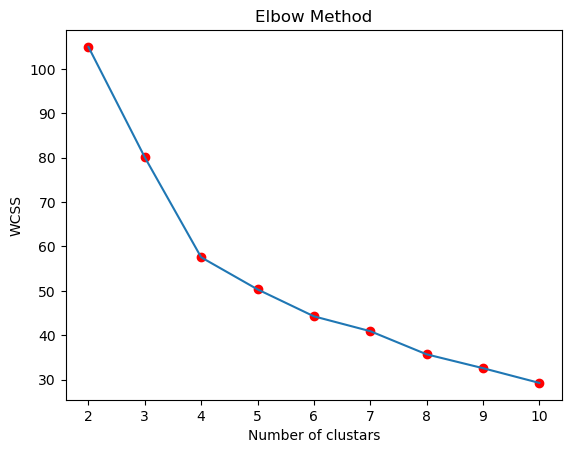

In [38]:
#perform KMeans clustering
#plot Elbow Chart to decide best number of clusters.
wcss=[]
for i in range (2,11):
    Kmeans=KMeans(n_clusters=i,random_state=42)
    Kmeans.fit(crime_k)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(2,11),wcss) 
plt.scatter(range(2,11), wcss, color = "red")
plt.title('Elbow Method')
plt.xlabel('Number of clustars')
plt.ylabel('WCSS')
plt.show()

As from Elbow Chart we conclude that 4 numbers of clusters are best.

In [39]:
#within cluster sum of squared
wcss

[104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.33327385184907,
 44.259807638112314,
 40.912667222473445,
 35.69587706333373,
 32.57509993011513,
 29.253498916734603]

In [40]:
# selecting 4 clusters from above scree plot
Kmeans=KMeans(n_clusters=4)
Kmeans=Kmeans.fit_predict(crime_k)
Kmeans

array([3, 0, 0, 3, 0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 1, 2, 3, 2, 0, 1, 0,
       2, 3, 0, 2, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 0, 1,
       2, 1, 1, 2, 2, 1])

In [41]:
#make dataframe and attached clusterId column
crime_k['k_ClusterId']=pd.DataFrame(Kmeans,columns=['k_ClusterId'])
crime_k

,Murder,Assault,UrbanPop,Rape,k_ClusterId
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,0
2,0.072361,1.493817,1.009122,1.053466,0
3,0.234708,0.233212,-1.084492,-0.186794,3
4,0.281093,1.275635,1.776781,2.088814,0
5,0.025976,0.402909,0.869548,1.883901,0
6,-1.040880,-0.736484,0.799761,-1.092723,1
7,-0.437875,0.815030,0.450825,-0.585834,1
8,1.765415,1.990786,1.009122,1.150530,0
9,2.229265,0.487757,-0.386621,0.492653,3


In [42]:
#Aply Groupby on dataframe and count mean
crime_k.groupby('k_ClusterId').agg(['mean']).reset_index()

,k_ClusterId,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.702127,1.049994,0.729974,1.289904
1,1,-0.494407,-0.386484,0.581676,-0.264310
2,2,-0.971303,-1.117836,-0.939550,-0.976578
3,3,1.426224,0.883211,-0.822791,0.019467


Conclusion:

In KMeans we have 4 clusters.

The places which has maximum crime are in 1st cluster (clusterId=0).

The places which has minimum crime rate are in 3rd cluster (clusterId=2).

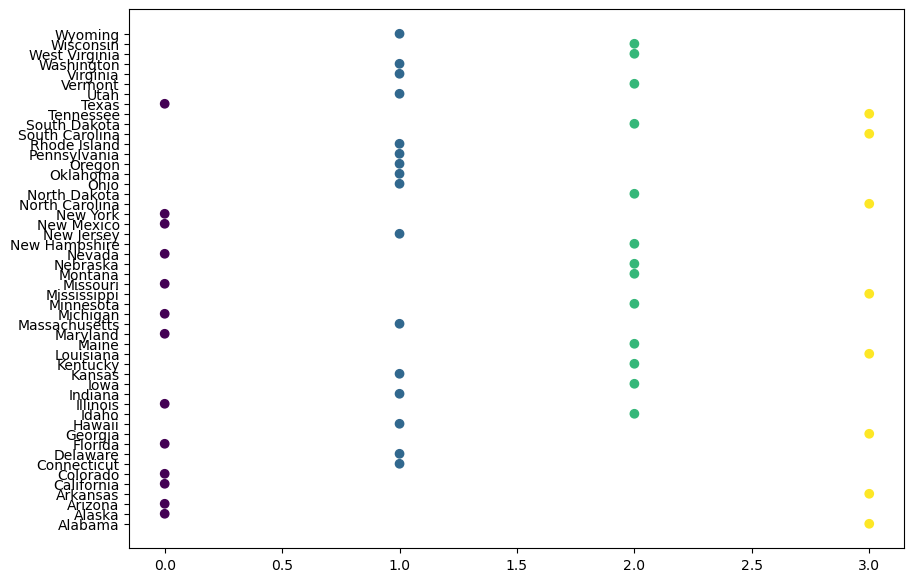

In [51]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_k['k_ClusterId'],crime['Place'], c=Kmeans) 

In [53]:
#checking silhouette score for Hierarchical Clustering
silhouette_score(crime_k,Kmeans)

0.4441495431133052

# DBSCAN

In [54]:
#import library for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [55]:
#load the dataset
crime_d=pd.read_csv('crime_data.csv')

In [56]:
#check first 5 rows
crime_d.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


<AxesSubplot:>

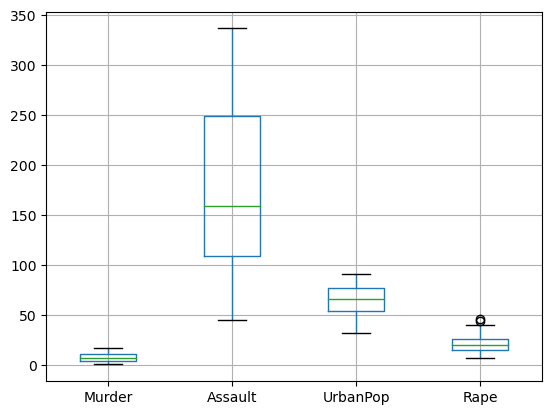

In [57]:
#make a boxplot to check noisy points (outliers)
crime_d.boxplot()

Here we can see high varience in cloumn Assault

In [58]:
crime_d.columns[1:]

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [60]:
#convert into arrays.(.values)
array=crime_d.values[:,1:]
array

array([[13.2, 236, 58, 21.2],
       [10.0, 263, 48, 44.5],
       [8.1, 294, 80, 31.0],
       [8.8, 190, 50, 19.5],
       [9.0, 276, 91, 40.6],
       [7.9, 204, 78, 38.7],
       [3.3, 110, 77, 11.1],
       [5.9, 238, 72, 15.8],
       [15.4, 335, 80, 31.9],
       [17.4, 211, 60, 25.8],
       [5.3, 46, 83, 20.2],
       [2.6, 120, 54, 14.2],
       [10.4, 249, 83, 24.0],
       [7.2, 113, 65, 21.0],
       [2.2, 56, 57, 11.3],
       [6.0, 115, 66, 18.0],
       [9.7, 109, 52, 16.3],
       [15.4, 249, 66, 22.2],
       [2.1, 83, 51, 7.8],
       [11.3, 300, 67, 27.8],
       [4.4, 149, 85, 16.3],
       [12.1, 255, 74, 35.1],
       [2.7, 72, 66, 14.9],
       [16.1, 259, 44, 17.1],
       [9.0, 178, 70, 28.2],
       [6.0, 109, 53, 16.4],
       [4.3, 102, 62, 16.5],
       [12.2, 252, 81, 46.0],
       [2.1, 57, 56, 9.5],
       [7.4, 159, 89, 18.8],
       [11.4, 285, 70, 32.1],
       [11.1, 254, 86, 26.1],
       [13.0, 337, 45, 16.1],
       [0.8, 45, 44, 7.3],
       [7.

In [61]:
#Normalize the data using Normalization Function- Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(array)
X = scaler.transform(array)

In [62]:
#perform DBSCAN clustering
dbscan = DBSCAN(eps=1.1, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1.1)

In [63]:
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [64]:
#make dataframe and attached clusterId column
crime_d['d_ClusterId']=pd.DataFrame(dbscan.labels_,columns=['d_ClusterId'])
crime_d

,Place,Murder,Assault,UrbanPop,Rape,d_ClusterId
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [65]:
#Apply Groupby on the dataframe and count mean
crime_d.groupby('d_ClusterId').agg(['mean']).reset_index()

C:\Users\Parth\AppData\Local\Temp\ipykernel_11812\1696846335.py:2: FutureWarning: ['Place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime_d.groupby('d_ClusterId').agg(['mean']).reset_index()


,d_ClusterId,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,12.010000,258.250000,68.500000,28.545000
1,0,4.973333,112.433333,63.566667,16.356667


Text(0.5, 0, 'd_ClusterId')

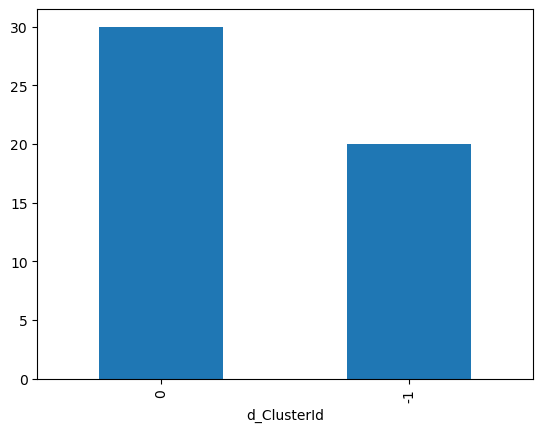

In [66]:
#barplot of clusterID
crime_d["d_ClusterId"].value_counts().plot.bar()
plt.xlabel('d_ClusterId')

Conclusion:

In DBSCAN we have 2 clusters.

clusterId=-1 has noisy records (outliers) & places which has maximum crime rate are in this cluster .

The places which has minimum crime rate are in 2nd cluster (clusterId=0).

In [68]:
#Checking silhouette score
silhouette_score(array,dbscan.labels_)

0.5892954376969437

### A Silhouette score ranges from -1 to 1.
### With -1 being the worst score possible and 1 being the best sore.
### Silhouette score of 0 suggest overlaping of clusters.